# Cities & Weather

## Instructions

For this exercise, either work with the cities list as provided, or add a few cities of your own. If you finish the main challenge and feel ambitious, try using a subset of [CountriesToCities.json](https://github.com/David-Haim/CountriesToCitiesJSON) for this activity.

* Load your `cities.csv` file, and use it to create a list of city names you can search for.

* Request weather information on each city, and store each response in a list.

* Collect longitude and atmospheric pressure data for each city. Use the API documentation to determine which keys to extract.

* Put this data into a dict, and load that dict into a Pandas DataFrame.

* Use matplotlib to create a scatter plot of pressures vs longitudes.


In [1]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [2]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [3]:
cities = ["London", "Paris", "Las Vegas", "Stockholm", "Sydney", "Hong Kong"]

In [5]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [16]:
weather_data = []

for city in cities:
    response = requests.get(query_url+city).json()
    weather_data.append(response)
    
#weather_data

In [17]:
lon_data = [data.get('coord').get('lon') for data in weather_data]
lon_data

[-0.13, 2.35, -115.15, 18.07, 151.22, 114.16]

In [18]:
pres_data = [data.get("main").get("pressure") for data in weather_data]
pres_data

[1007, 1011, 1018, 998, 1014, 1019]

In [19]:
weather_pres = {'pressure': pres_data, "lon": lon_data}
weather_pres

{'lon': [-0.13, 2.35, -115.15, 18.07, 151.22, 114.16],
 'pressure': [1007, 1011, 1018, 998, 1014, 1019]}

In [20]:
weather_df = pd.DataFrame(weather_pres)
weather_df

,lon,pressure
0,-0.13,1007
1,2.35,1011
2,-115.15,1018
3,18.07,998
4,151.22,1014
5,114.16,1019


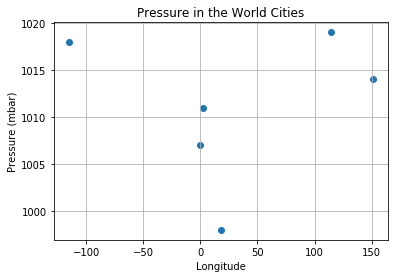

In [23]:
plt.scatter(weather_df['lon'], weather_df['pressure'], marker='o')
plt.title("Pressure in the World Cities")
plt.ylabel("Pressure (mbar)")
plt.xlabel("Longitude")
plt.grid(True)
plt.savefig("pressure_in_cities.png")
plt.show()